In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go


In [2]:
ttf = pd.read_csv('../data/interpolated/ttf_close_interpolated.csv')
ttf['date'] = pd.to_datetime(ttf['Date'])
ttf = ttf.set_index('date')

nbp = pd.read_csv('../data/interpolated/nbp_close_interpolated.csv')
nbp['date'] = pd.to_datetime(nbp['Date'])
nbp = nbp.set_index('date')

the = pd.read_csv('../data/interpolated/the_close_interpolated.csv')
the['date'] = pd.to_datetime(the['Date'])
the = the.set_index('date')

In [3]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=ttf.index, y=ttf['CLOSE'], mode='lines', name='TTF'))
fig.add_trace(go.Scatter(x=nbp.index, y=nbp['CLOSE'], mode='lines', name='NBP'))
fig.add_trace(go.Scatter(x=the.index, y=the['CLOSE'], mode='lines', name='THE'))

fig.update_layout(title='CLOSE Prices Over Time',
                  xaxis_title='Date',
                  yaxis_title='CLOSE Price')

fig.show()

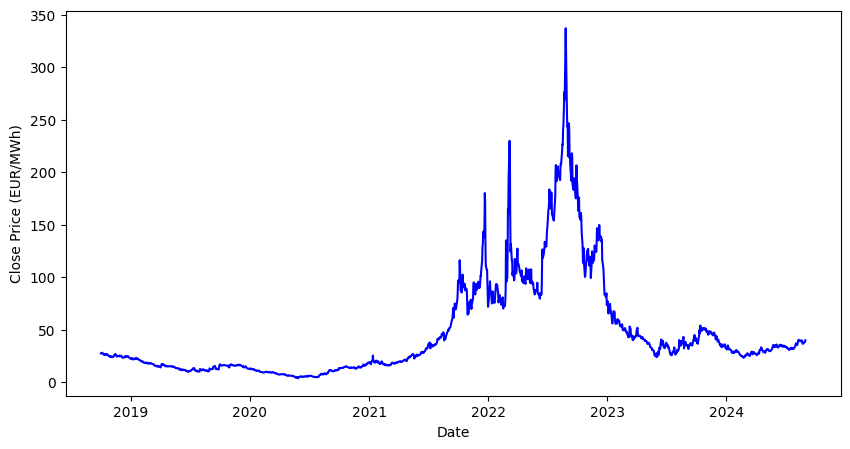

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(the.index, the['CLOSE'], label='THE', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price (EUR/MWh)')
#plt.grid(True, axis='y')
plt.show()